In [5]:
# Let's import all the required libraries
import numpy as np
import seaborn as sns
import matplotlib as mat
import pandas as pd

# We are using scikit learn library for the model
from sklearn.model_selection import train_test_split, GridSearchCV # train test to split the data into training and testing and gridsearch is to yune the model
from sklearn.ensemble import RandomForestClassifier # this is the model we are building - Random Forest
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report # all these are used to check if the model is performing well or not


In [6]:
d = pd.read_csv('/content/drive/MyDrive/Cancer_data_for_RF.csv')
d.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
# Now, we need to prepare the data for the model and for that we need to remove columns that are not necessary, for example id is not necessary for the model and "Unnamed: 32"
#is another column that we do not need. There are 33 columns in the df and after removing the aforementioned columns, we are left with 31 columns and even in that, not all of them are necessary
#we will worry about that later, so let's remove the 2 columns that we don't need as of now.

d.drop(['Unnamed: 32', 'id'], axis = 1, inplace = True)

In [8]:
# Our target column is "diagnosis" and it is categorical, so we will convert it to numerical
print(d['diagnosis'].unique())
# This values of this column can be mapped manually or we can even use encoders to do that.
d['diagnosis'] = d['diagnosis'].map({'M':1, 'B':2})
d.head()

['M' 'B']


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
# we will now split the data and seprate the target column from the rest
x = d.drop(['diagnosis'], axis = 1)
y = d['diagnosis']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=50)

In [10]:
'''RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None,
min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0,
bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0,
warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)'''
# There are a lot of options in random forest and we will be using gridsearch CV to get the best parameters for the model

rf = RandomForestClassifier(random_state=50)
para = {'criterion':['gini', 'entropy', 'log_loss'],
        "max_features":['sqrt', 'log2', None]}

cv = GridSearchCV(estimator = rf, param_grid = para, n_jobs = -1)
cv.fit(xtrain, ytrain)
print(f'The best parameters are {cv.best_params_}')

The best parameters are {'criterion': 'gini', 'max_features': 'sqrt'}


In [11]:
#With the best parameters we can build a model now, but before we do that, we need to know the value of n_estimators, i.e. The number of trees in the forest.

best_para = cv.best_params_
model_1 = RandomForestClassifier(**best_para, random_state=50)

# We can wither use cross validation process or use OOB error method to get our desired number. CV or cross validation is the gold standard for estimating model accuracy.
# However, it computationally intensive process and not necessary always. OOB is another method that can be used to get the same result, it stands for Out of Bag Error.
# Random Forest uses bootstrap sampling and that leaves out some data that is not used in the process. These "left out" data points are referred to as "Out of Bag" (OOB).
# The OOB error is then calculated by predicting the accuracy of each decision tree on its respective OOB data and averaging these predictions.
# we will also use OOB here to get out result.

In [12]:
# OOB
model_1.set_params(warm_start = True, oob_score = True, n_jobs = -1)
# Now we will create multiple models and compare its accuracy and we will use loops to do that.
error = {} # to store the error
a = 10 # minimum number for the n_estimator
b = 800 # maximum number for the n_estimator
for i in range(a, b+1):
  model_1.set_params(n_estimators = i)
  model_1.fit(xtrain, ytrain)
  er = 1-model_1.oob_score_  # this to calculate the error as oob_score_ calculates accuracy
  error[i] = er


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


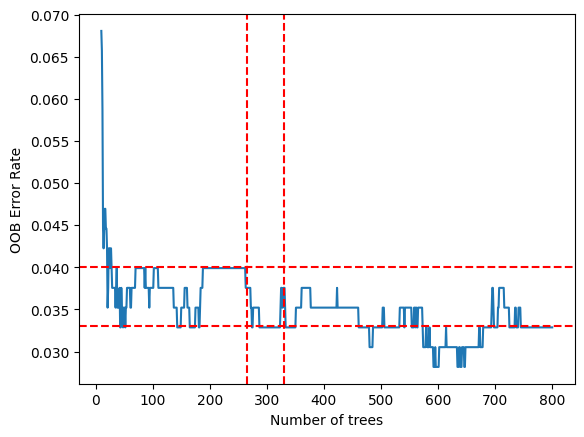

In [13]:
# We can plot the error to get the optimum no of trees required while keeping the error as low as possible
n = list(error.keys())
m = list(error.values())
mat.pyplot.xlabel('Number of trees')
mat.pyplot.ylabel('OOB Error Rate')
mat.pyplot.plot(n,m)
mat.pyplot.axhline(0.033, color='red', ls='--')
mat.pyplot.axhline(0.040, color='red', ls='--')
mat.pyplot.axvline(265, color='red', ls='--')
mat.pyplot.axvline(330, color='red', ls='--')
mat.pyplot.show()

In [14]:
# we can use the number of trees from the above graph to refine the model
model_1.set_params(n_estimators = 291, warm_start = False, oob_score = False, random_state = 50)
model_1.fit(xtrain, ytrain)
train_score = model_1.score(xtrain, ytrain)*100

# let's use this model to make the prediction and check how the model is performing
ypred = model_1.predict(xtest)
test_score = accuracy_score(ytest, ypred)*100

print(f'The training score is:{round(train_score, 1)} % and the testing score is:{round(test_score, 1)} %')

The training score is:100.0 % and the testing score is:96.5 %


Confusion matrix:

               precision    recall  f1-score   support

           1       0.94      0.96      0.95        53
           2       0.98      0.97      0.97        90

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143



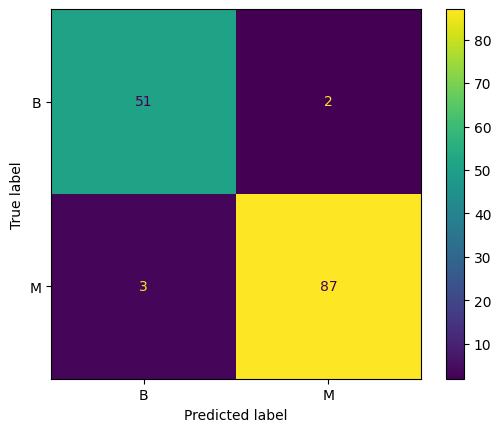

In [15]:
# we can use confusion matrix to check the model
con_mat = ConfusionMatrixDisplay.from_predictions(ytest, ypred , display_labels = ["B", "M"])
print("Confusion matrix:\n\n", classification_report(ytest, ypred))

In [16]:
# After we removed 2 columns from the data frame, I remember talking about removing some more columns later, why?
# The model has used the given data for training and now we can check from the model which of the columns have more importance and which are not important.
# We can get rid of the not-so-important columns and then train the model again.


In [17]:
# Extracting feature importances and corresponding feature names
feature_importance = model_1.feature_importances_
feature_names = xtrain.columns

impurity_df = pd.DataFrame({
    'Column_name': feature_names,
    'Mean_impurity': feature_importance
})

impurity_df = impurity_df.sort_values(by='Mean_impurity', ascending=False)
impurity_df['Percentage_impurity'] = round(impurity_df['Mean_impurity'] * 100, 3)
impurity_df['Cumulative_impurity'] = impurity_df['Percentage_impurity'].cumsum()
impurity_df
# Don't worry about the index numbers, if needed, reset it.

,Column_name,Mean_impurity,Percentage_impurity,Cumulative_impurity
27,concave points_worst,0.142722,14.272,14.272
23,area_worst,0.135791,13.579,27.851
22,perimeter_worst,0.125065,12.507,40.358
20,radius_worst,0.121162,12.116,52.474
7,concave points_mean,0.098762,9.876,62.350
0,radius_mean,0.043179,4.318,66.668
3,area_mean,0.041891,4.189,70.857
6,concavity_mean,0.040331,4.033,74.890
2,perimeter_mean,0.031628,3.163,78.053
26,concavity_worst,0.026910,2.691,80.744


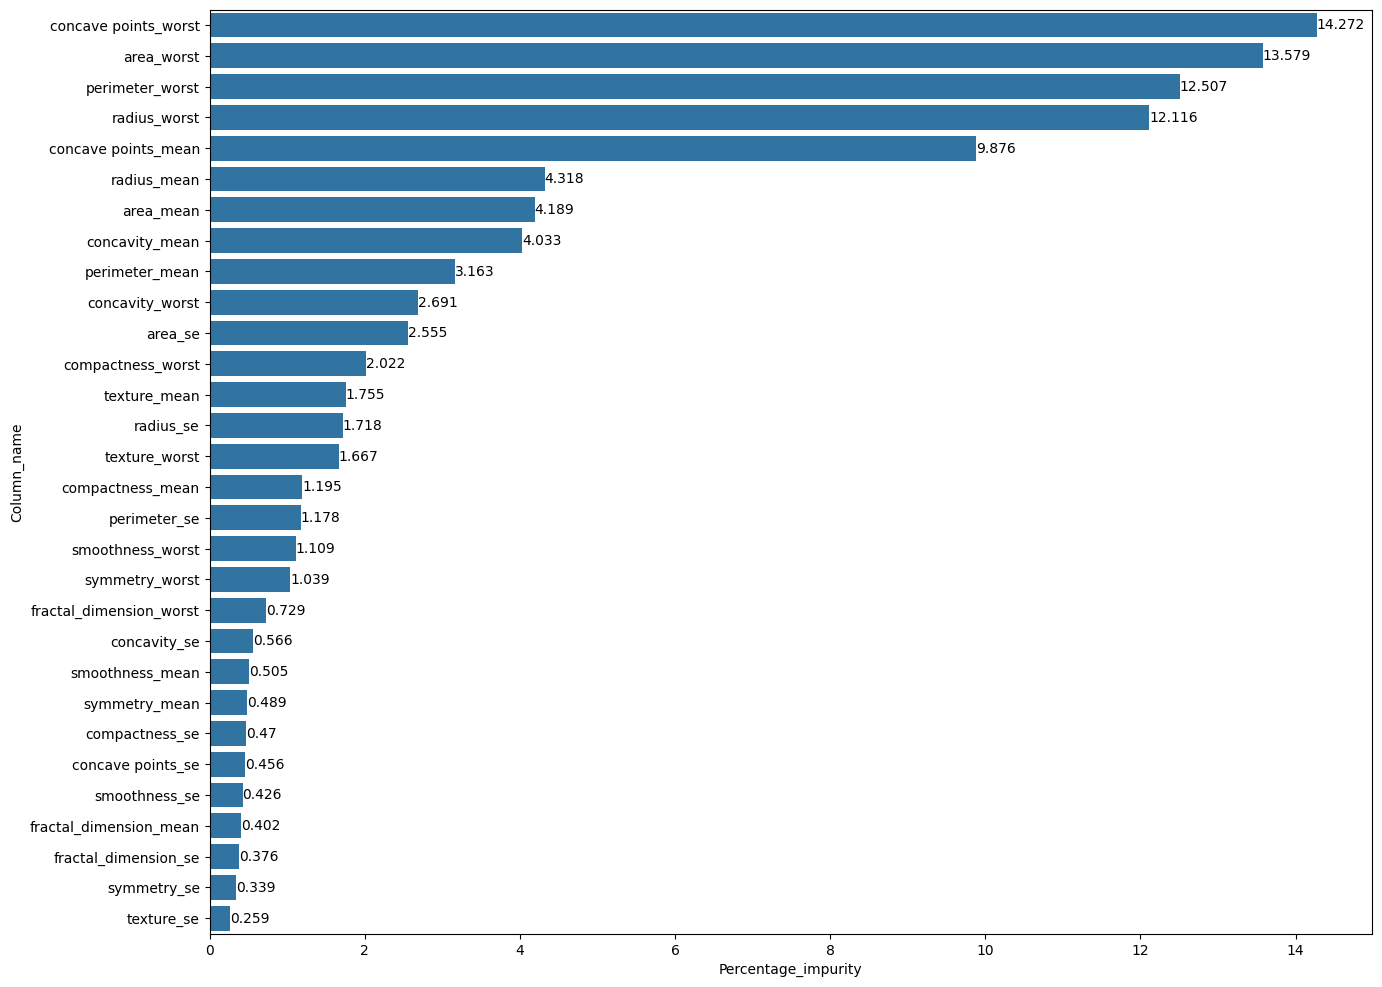

In [32]:
# in the impurity data frame, we can observe that the cummulative impurity has reached 90 percent within just 18 or 19 columns
# this means that the rest of the columns are not contributing that much to the model, they are not that important and we can remove some of them and train the model again.

fig, ax = mat.pyplot.subplots(figsize=(15,12))
ax = sns.barplot( y = impurity_df['Column_name'], x = impurity_df['Percentage_impurity'] )
ax.bar_label(ax.containers[0])
mat.pyplot.show()

# it is possible that the column that has been identified with low mean impurity is actually a bit important, so we need to check it and remove the columns manually and do not
# remove all the columns at once, remove a couple and run the algo and observe how the model is reacting.

In [50]:
# As of now, I will remove all the columns below 95% cumulative impurity
col_lst = list(impurity_df[impurity_df['Cumulative_impurity']<= 95]['Column_name'])
col_lst

['concave points_worst',
 'area_worst',
 'perimeter_worst',
 'radius_worst',
 'concave points_mean',
 'radius_mean',
 'area_mean',
 'concavity_mean',
 'perimeter_mean',
 'concavity_worst',
 'area_se',
 'compactness_worst',
 'texture_mean',
 'radius_se',
 'texture_worst',
 'compactness_mean',
 'perimeter_se',
 'smoothness_worst',
 'symmetry_worst']

In [51]:
# We can now use this column list that we have created to select the data from the training dataframe
xtrain_filtered = xtrain[col_lst]
xtest_filtered = xtest[col_lst]


Confusion Matrix:

               precision    recall  f1-score   support

           1       0.93      0.94      0.93        53
           2       0.97      0.96      0.96        90

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



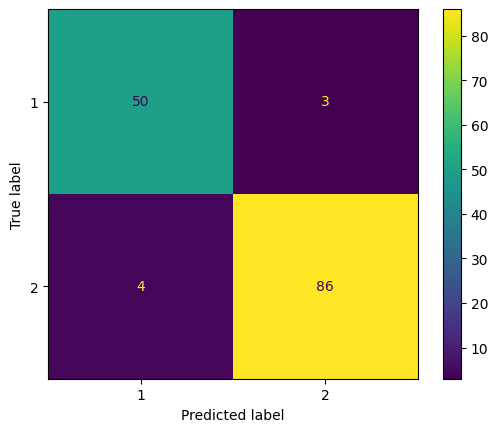

In [55]:
# now we can make make changes to the model
final_parameters_model_1 = model_1.get_params()
final_model = RandomForestClassifier(**final_parameters_model_1)
final_model.fit(xtrain_filtered, ytrain)
final_pred = final_model.predict(xtest_filtered)
confusion_matrix_final = ConfusionMatrixDisplay.from_predictions(ytest, final_pred)
print("Confusion Matrix:\n\n", classification_report(ytest, final_pred))

In [56]:
print("The training score is: ", final_model.score(xtrain_filtered, ytrain))

The training score is:  1.0
